In [26]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [11]:
#re-size all the images to this
IMAGE_SIZE=(224,224)
#Train data(images) path
train_path='C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/bike vs car/Bike and Car/Train'
#Test data(images) path
valid_path='C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/bike vs car/Bike and Car/Test'

# Add preprocessing layer to the front of VGG19

In [5]:

vgg19 = VGG19(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)


for layer in vgg19.layers:
    layer.trainable = False



80134624/80134624 [==============================] - 14s 0us/step


In [12]:
#Getting number of classes
folders = glob('C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/bike vs car/Bike and Car/Train/*')

In [13]:
folders

['C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/bike vs car/Bike and Car/Train\\Bikes',
 'C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/bike vs car/Bike and Car/Train\\Car']

In [14]:
len(folders)

2

In [17]:
#Our layers - you can add more layer if you want
x=Flatten()(vgg19.output)
#Defined the output layer
prediction=Dense(len(folders),activation='softmax')(x)

# create a model object

In [18]:
model=Model(inputs=vgg19.input,outputs=prediction)

print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
#Tell the model -What cost & optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [23]:
#to perform image augmentation

from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

#Training set
print('Training length:\n')
training_set=train_datagen.flow_from_directory('C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/bike vs car/Bike and Car/Train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')
print('='*100)

#Testing set
print('Test length:\n')

test_set=test_datagen.flow_from_directory('C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/bike vs car/Bike and Car/Test',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical')

Training length:

Found 508 images belonging to 2 classes.
Test length:

Found 253 images belonging to 2 classes.


# Train the model


In [24]:
r=model.fit(training_set,
 validation_data=test_set,
 epochs=30,
 steps_per_epoch=len(training_set),
 validation_steps=len(test_set))


Epoch 1/30


 3/16 [====>.........................] - ETA: 37s - loss: 0.8733 - accuracy: 0.5625

C:\Users\MEGHA\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 67s 4s/step - loss: 0.3198 - accuracy: 0.8484 - val_loss: 0.0818 - val_accuracy: 0.9565
Epoch 2/30
16/16 [==============================] - 63s 4s/step - loss: 0.0417 - accuracy: 0.9882 - val_loss: 0.0540 - val_accuracy: 0.9842
Epoch 3/30
16/16 [==============================] - 66s 4s/step - loss: 0.0350 - accuracy: 0.9921 - val_loss: 0.0496 - val_accuracy: 0.9921
Epoch 4/30
16/16 [==============================] - 63s 4s/step - loss: 0.0177 - accuracy: 0.9980 - val_loss: 0.0486 - val_accuracy: 0.9881
Epoch 5/30
16/16 [==============================] - 63s 4s/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0662 - val_accuracy: 0.9565
Epoch 6/30
16/16 [==============================] - 63s 4s/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0425 - val_accuracy: 0.9921
Epoch 7/30
16/16 [==============================] - 63s 4s/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0571 - val_accuracy: 0.9605
Epoch 8/30
16/16 [=============

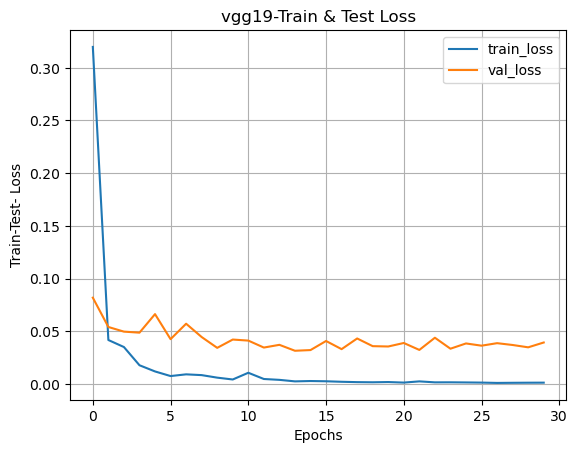

<Figure size 640x480 with 0 Axes>

In [27]:
#loss
plt.title('vgg19-Train & Test Loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg19--Loss & Val_loss')


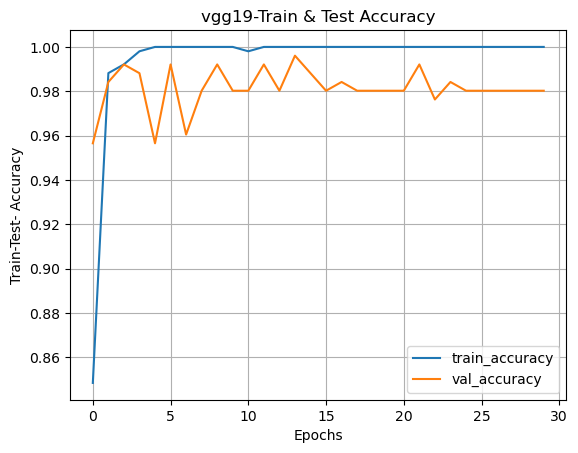

<Figure size 640x480 with 0 Axes>

In [28]:
#Accuracy
plt.title('vgg19-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg19--Accuracy & Val_accuracy')

In [29]:
import tensorflow as tf
from keras.models import load_model
model.save('vgg19_bike vs car.h5')

C:\Users\MEGHA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
model.save('vgg19_bike vs car.keras')

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [33]:
#Confusion Matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*100)
print('Classification Report')
print(classification_report(test_set.classes,ypred,target_names=['Bike','Car']))
print('='*100)
print('Accuracy Score')
print(accuracy_score(test_set.classes,ypred))

8/8 [==============================] - 36s 4s/step
Confusion Matrix
[[72 67]
 [62 52]]
Classification Report
              precision    recall  f1-score   support

        Bike       0.54      0.52      0.53       139
         Car       0.44      0.46      0.45       114

    accuracy                           0.49       253
   macro avg       0.49      0.49      0.49       253
weighted avg       0.49      0.49      0.49       253

Accuracy Score
0.4901185770750988


<Axes: >

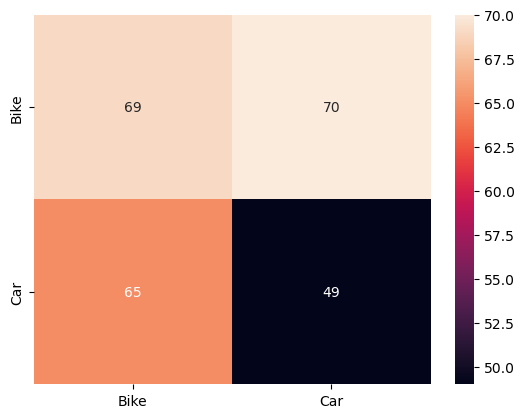

In [36]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['Bike','Car'],
 yticklabels=['Bike','Car'])

In [ ]:
 #for multiple class

In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet import MobileNet
from keras.applications.inception_v3 import preprocess_input as inception_preprocess_input
from keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = 'C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/Footwear/Train/'
valid_path = 'C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/Footwear/Test/'

In [7]:
#add preprocessing layer to the front ofmobilenet
mobilenet= MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#don't train existing weights 
for layer in mobilenet.layers: 
    layer.trainable =False



17225924/17225924 [==============================] - 3s 0us/step


In [8]:
 # useful for getting number of classes
folders = glob('C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/Footwear/Train/*')

In [9]:
folders

['C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/Footwear/Train\\Boot',
 'C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/Footwear/Train\\Sandal',
 'C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/Footwear/Train\\Shoe']

In [11]:
# our layers - you can add more if you want
x = Flatten()(mobilenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [15]:
# tell the model what cost and optimization method to use
model.compile(
 loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy']
)

In [16]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
 shear_range = 0.2,
 zoom_range = 0.2,
 horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/Footwear/Train/',
 target_size = (224, 224),
 batch_size = 32,
 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('C:/Users/MEGHA/OneDrive/Desktop/Practice Exercise/DL with Python/Footwear/Test/',
 target_size = (224, 224),
 batch_size = 32,
 class_mode = 'categorical')

Found 474 images belonging to 3 classes.
Found 509 images belonging to 3 classes.


In [17]:
# fit the model
r = model.fit(
 training_set,
 validation_data=test_set,
 epochs=10,
 steps_per_epoch=len(training_set),
 validation_steps=len(test_set)
)


Epoch 1/10


15/15 [==============================] - 36s 2s/step - loss: 9.4639 - accuracy: 0.2722 - val_loss: 8.2428 - val_accuracy: 0.1827
Epoch 2/10
15/15 [==============================] - 23s 2s/step - loss: 6.0765 - accuracy: 0.2743 - val_loss: 4.0482 - val_accuracy: 0.3458
Epoch 3/10
15/15 [==============================] - 24s 2s/step - loss: 6.0314 - accuracy: 0.2932 - val_loss: 4.4428 - val_accuracy: 0.3340
Epoch 4/10
15/15 [==============================] - 26s 2s/step - loss: 6.1803 - accuracy: 0.2954 - val_loss: 4.7947 - val_accuracy: 0.2397
Epoch 5/10
15/15 [==============================] - 27s 2s/step - loss: 6.4269 - accuracy: 0.2890 - val_loss: 4.9250 - val_accuracy: 0.2750
Epoch 6/10
15/15 [==============================] - 23s 2s/step - loss: 7.5190 - accuracy: 0.3017 - val_loss: 6.4165 - val_accuracy: 0.4126
Epoch 7/10
15/15 [==============================] - 25s 2s/step - loss: 7.7658 - accuracy: 0.3165 - val_loss: 4.2378 - val_accuracy: 0.3929
Epoch 8/10
15/15 [

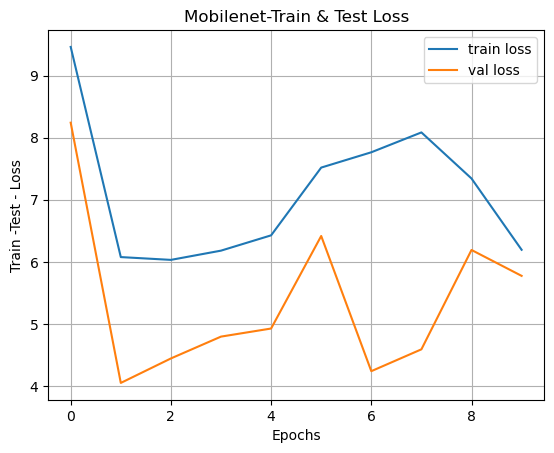

<Figure size 640x480 with 0 Axes>

In [26]:
# loss
plt.title('Mobilenet-Train & Test Loss')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Train -Test - Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('Mobilenet--LossVal_loss')

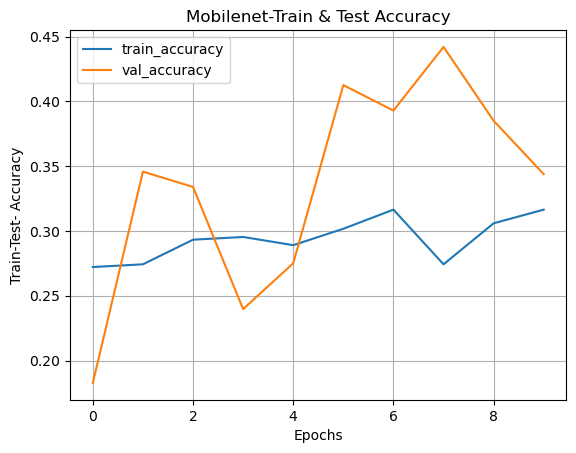

<Figure size 640x480 with 0 Axes>

In [27]:
#Accuracy
plt.title('Mobilenet-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('Mobilenet--Accuracy & Val_accuracy')

In [23]:
import tensorflow as tf
from keras.models import load_model
model.save('MobileNet_Footwear.h5')

In [24]:
model.save('MobileNet_Footwear.keras')

In [28]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [30]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_set, 100 // 5)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['fairly_infected', 'highly_infected', 'lightly_infected']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

C:\Users\MEGHA\AppData\Local\Temp\ipykernel_22212\85688998.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set, 100 // 5)


Confusion Matrix
[[ 72   2 119]
 [ 51   1 106]
 [ 62   6  90]]
Classification Report
                  precision    recall  f1-score   support

 fairly_infected       0.39      0.37      0.38       193
 highly_infected       0.11      0.01      0.01       158
lightly_infected       0.29      0.57      0.38       158

        accuracy                           0.32       509
       macro avg       0.26      0.32      0.26       509
    weighted avg       0.27      0.32      0.27       509



<Axes: >

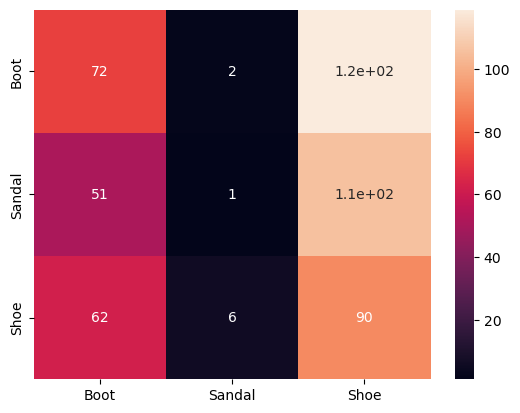

In [31]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes, y_pred),annot=True,xticklabels=['Boot', 'Sandal','Shoe'],
 yticklabels=['Boot', 'Sandal', 'Shoe'])